In [1]:
SYSTEM_PROMPT = """
You are a Satellite Data Extraction Agent helping a user gather structured mission information about satellites.

You can reason step-by-step, and when needed, you may use the following tools to search for reliable data:
{tool_names}

Your job is to:
1. Think about what information is missing.
2. Use ONE tool at a time to find facts. Do NOT guess.
3. Extract structured mission information.
4. Once everything is found, return ONLY the final output in strict JSON format.

STRICT RULES:
- Use tools only when necessary.
- Never fabricate information.
- Final answer must match the expected JSON schema exactly.
- Always return "null" as a string if any information is not available.
- Final output should be just the JSON block, nothing else.

You are allowed to Think, Act, and Observe in steps before giving the final Answer.
"""

In [2]:
"""
Example 2:
Input: Cartosat-3
OUTPUT: 
```json
{{
    "mission_name": "Cartosat-3" 
    "vehicle_type_name": "PSLV-C47"
    "altitude": "509"
    "orbital_life_years": "5" 
    "launch_orbit_classification": "SSO"
    "number_of_payloads": "1"
    "satellite_type": "Earth Observation"
    "application_description": "High-resolution imaging satellite for cartographic applications"
}}
```"""

"""AIMessage``json
{{
    "mission_name": "Chandrayaan-3"
    "vehicle_type_name": "LVM-3"
    "altitude": "170 x 36500 km"
    "altitude_source_reference": "https://www.isro.gov.in/media_isro/pdf/Missions/LVM3/LVM3M4_Chandrayaan3_brochure.pdf"
    "orbital_life_years": "1"
    "orbital_life_source_reference":"https://www.isro.gov.in/media_isro/pdf/Missions/LVM3/LVM3M4_Chandrayaan3_brochure.pdf"
    "launch_orbit_classification": "GTO"
    "launch_orbit_source_reference":"https://www.isro.gov.in/Chandrayaan3_Details.html"
    "number_of_payloads": "7"
    "number_of_payloads_source_reference":"https://www.isro.gov.in/Chandrayaan3_Details.html"
    "satellite_type": "Science & Exploration"
    "application_description": "Lunar exploration mission to demonstrate soft landing and roving capabilities"
    "application_description_source_reference":"https://en.wikipedia.org/wiki/Chandrayaan-3"
}}
1. mission_name: Extract the official mission name from authenticated and official sources.
2. vehicle_type_name: Find the launch vehicle name (e.g., PSLV, GSLV) near launch details.
3. altitude: Extract the orbit altitude in kilometers (look for numbers with "km" or "kilometers").
4. altitude_source_reference: Provide the URL where altitude was found.
5. orbital_life_years: Find mission duration or orbital life in years (convert if needed).
6. orbital_life_source_reference: Provide the URL where orbital life info was found.
7. launch_orbit_classification: Identify orbit type (e.g., LEO, SSO, GTO).
8. launch_orbit_source_reference: Provide the URL where orbit classification was found.
9. number_of_payloads: Count payloads/instruments mentioned.
10. number_of_payloads_source_reference: Provide the URL where payload count was found.
11. satellite_type: Classify as one of Communication, Earth Observation, Experimental, Navigation, or Science & Exploration based on mission purpose.
12. application_description: Summarize the main mission objective.
13. application_description_source_reference: Provide the URL where description was found.
``
"""

'AIMessage``json\n{{\n    "mission_name": "Chandrayaan-3"\n    "vehicle_type_name": "LVM-3"\n    "altitude": "170 x 36500 km"\n    "altitude_source_reference": "https://www.isro.gov.in/media_isro/pdf/Missions/LVM3/LVM3M4_Chandrayaan3_brochure.pdf"\n    "orbital_life_years": "1"\n    "orbital_life_source_reference":"https://www.isro.gov.in/media_isro/pdf/Missions/LVM3/LVM3M4_Chandrayaan3_brochure.pdf"\n    "launch_orbit_classification": "GTO"\n    "launch_orbit_source_reference":"https://www.isro.gov.in/Chandrayaan3_Details.html"\n    "number_of_payloads": "7"\n    "number_of_payloads_source_reference":"https://www.isro.gov.in/Chandrayaan3_Details.html"\n    "satellite_type": "Science & Exploration"\n    "application_description": "Lunar exploration mission to demonstrate soft landing and roving capabilities"\n    "application_description_source_reference":"https://en.wikipedia.org/wiki/Chandrayaan-3"\n}}\n1. mission_name: Extract the official mission name from authenticated and officia

In [2]:
BASIC_MISSION_PROMPT="""
You are a Satellite Data Extraction Agent that can use tools like web search to help you answer questions about satellite missions.


INSTRUCTIONS FOR EXTRACTING EACH FIELD:
1. altitude: Extract the orbit altitude in kilometers (look for numbers with "km" or "kilometers").
2. altitude_source_reference: Provide the URL where altitude was found.
3. orbital_life_years: Find mission duration or orbital life in years (convert if needed).
4. orbital_life_source_reference: Provide the URL where orbital life info was found.
5. launch_orbit_classification: Identify orbit type (e.g., LEO, SSO, GTO).
6. launch_orbit_source_reference: Provide the URL where orbit classification was found.
7. number_of_payloads: Count payloads/instruments mentioned.
8. number_of_payloads_source_reference: Provide the URL where payload count was found.

Here are some examples of correct responses (following the format above):

Example :
Input: Chandrayaan-3
OUTPUT:
json
{{
    "altitude": "170 x 36500 km"
    "altitude_source_reference": "https://www.isro.gov.in/media_isro/pdf/Missions/LVM3/LVM3M4_Chandrayaan3_brochure.pdf"
    "orbital_life_years": "3 to 6 months"
    "orbital_life_source_reference":"https://www.isro.gov.in/media_isro/pdf/Missions/LVM3/LVM3M4_Chandrayaan3_brochure.pdf"
    "launch_orbit_classification": "GTO"
    "launch_orbit_source_reference":"https://www.isro.gov.in/Chandrayaan3_Details.html"
    "number_of_payloads": "7"
    "number_of_payloads_source_reference":"https://www.isro.gov.in/Chandrayaan3_Details.html"
}}


Now, extract information for {satellite_name} from the search results.
IMPORTANT: 
1. Your response must follow the format instructions exactly
2. Include the 
json and
 markers
4. Use string values for all fields, even numbers
5. If any information is not found, use "null" as the value
6. Follow the extraction instructions carefully for each field
After the tool provides the search results, use those results to fill in the requested fields in the specified JSON format. Return only the JSON in your response.

{format_instructions}

"""

In [3]:
SENSOR_TECH_PROMPT = """
You are a Satellite Data Extraction Agent that can use tools like web search to help you answer questions about satellite sensor technologies and capabilities.

INSTRUCTIONS FOR EXTRACTING EACH FIELD:
1. sensor_specifications: Extract key technical details about the onboard sensors (e.g., sensor type, resolution, swath width, revisit time, etc.).
2. sensor_specifications_source_reference: Provide the URL where sensor specifications were found.
3. spectral_bands: Mention the spectral bands covered by the satellite sensors (e.g., visible, near-infrared, thermal, X-band, etc.).
4. spectral_bands_source_reference: Provide the URL where the spectral band information was found.
5. spatial_resolution: Mention the spatial resolution of the satellite sensors (e.g., 1 meter, 10 meter, 20 meter, etc.).
6. spatial_resolution_source_reference: Provide the URL where the spatial resolution information was found.
7. technological_breakthroughs: Describe any notable innovations, new technologies, or unique engineering features introduced in this mission.
8. technological_breakthroughs_source_reference: Provide the URL where the technological breakthroughs were found.
9. satellite_type: Classify the satellite as one of the following based on its mission purpose: Communication, Earth Observation, Experimental, Navigation, or Science & Exploration.

Here is an example of correct responses (following the format above):

Example:  
Input: RISAT-2B  
OUTPUT:
```json
{{
    "sensor_specifications": "X-band SAR with 1 meter resolution and day-night, all-weather imaging capability",
    "sensor_specifications_source_reference": "https://www.isro.gov.in/risat-2b.html",
    "spectral_bands": "X-band",
    "spectral_bands_source_reference": "https://www.isro.gov.in/risat-2b.html",
    "spatial_resolution": "1 meter",
    "spatial_resolution_source_reference": "https://www.isro.gov.in/risat-2b.html",
    "technological_breakthroughs": "Incorporation of indigenously developed radar technology and deployable radial rib antenna",
    "technological_breakthroughs_source_reference": "https://www.thehindu.com/sci-tech/science/risat-2b-satellite-launched-by-isro/article27232106.ece",
    "satellite_type": "Earth Observation"
}}
```

Now, extract information for {satellite_name} from the search results.
IMPORTANT: 
1. Your response must follow the format instructions exactly
2. Include the ```json and ``` markers
4. Use string values for all fields, even numbers
5. If any information is not found, use "null" as the value
6. Follow the extraction instructions carefully for each field
After the tool provides the search results, use those results to fill in the requested fields in the specified JSON format. Return only the JSON in your response.

{format_instructions}

"""

In [74]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [10]:

from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_community.tools import TavilySearchResults, Tool
from langchain.tools import tool

from langgraph.graph import StateGraph, START, END, MessagesState
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode,tools_condition

from typing import Optional, List, TypedDict, Dict
from typing_extensions import Annotated
from pydantic import BaseModel, Field

In [11]:
class BasicSatelliteData(BaseModel):
    altitude: Optional[str] = Field(description="Satellite altitude in kilometers, look for values with 'km' or 'kilometers'")
    altitude_source_reference: Optional[str] = Field(description="Source URLs used to find the altitude.")
    orbital_life_years: Optional[str] = Field(description="Orbital life or mission duration in years.")
    orbital_life_source_reference: Optional[str] = Field(description="Source URLs used to find orbital life.")
    launch_orbit_classification: Optional[str] = Field(description="Orbit classification such as GTO, LEO, or SSO.")
    launch_orbit_source_reference: Optional[str] = Field(description="Source URLs used to find orbit classification.")
    number_of_payloads: Optional[str] = Field(description="Count of payloads or instruments on the satellite.")
    number_of_payloads_source_reference: Optional[str] = Field(description="Source URLs used to find the number of payloads.")


class TechnicalData(BaseModel):
    sensor_specifications: Optional[List[str]]      # ----->>>>
    sensor_specifications_source_reference: Optional[str] = Field(description="Source URLs used to find sensor specifications.")
    spectral_bands: Optional[List[str]] = Field(description="Spectral bands covered by the satellite sensors (e.g., visible, near-infrared, thermal, X-band, etc.).")
    spectral_bands_source_reference: Optional[str] = Field(description="Source URLs used to find spectral bands.")
    spatial_resolution: Optional[str] = Field(description="Spatial resolution of the satellite sensors (e.g., 1 meter, 10 meter, 20 meter, etc.).")
    spatial_resolution_source_reference: Optional[str] = Field(description="Source URLs used to find spatial resolution.")
    technological_breakthroughs: Optional[List[str]] = Field(description="Notable innovations, new technologies, or unique engineering features introduced in this mission.")
    tech_source_reference: Optional[str] = Field(description="Source URLs used to find technological breakthroughs.")
    satellite_type: Optional[str] = Field(description="Classify the satellite as one of the following based on its mission purpose: Communication, Earth Observation, Experimental, Navigation, or Science & Exploration.")
    
class LaunchVehicleData(BaseModel):
    max_launch_mass_leo: Optional[float]
    max_launch_mass_reference: Optional[str]
    actual_launch_mass: Optional[float]
    actual_launch_mass_reference: Optional[str]
    launch_success: Optional[bool]
    vehicle_reusability: Optional[bool]
    reusability_details: Optional[str]
    reusability_source: Optional[str]

class CostData(BaseModel):
    mission_cost: Optional[Dict[str, float]]   # ----->>>>
    cost_reference: Optional[str]
    spacenext_launch_cost: Optional[float]
    spacenext_cost_reference: Optional[str]

In [8]:
class AgentState(MessagesState):
    satellite_name:str
    # current_step:str
    basic_data: Optional[BasicSatelliteData]
    technical_data: Optional[TechnicalData]
    # launch_vehicle_data: Optional[LaunchVehicleData]
    # cost_data: Optional[CostData]
    # status:str
    error_message: Optional[str]
    # next: Optional[str] = None

In [9]:
from langchain.output_parsers import StructuredOutputParser, ResponseSchema,PydanticOutputParser

basic_data_output_parser = PydanticOutputParser(pydantic_object=BasicSatelliteData)
basic_data_format_instructions = basic_data_output_parser.get_format_instructions()

technical_data_output_parser = PydanticOutputParser(pydantic_object=TechnicalData)
technical_data_format_instructions = technical_data_output_parser.get_format_instructions()

print("Format Instructions:")
print(basic_data_format_instructions)
print(technical_data_format_instructions)

Format Instructions:
The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"altitude": {"anyOf": [{"type": "string"}, {"type": "null"}], "description": "Satellite altitude in kilometers, look for values with 'km' or 'kilometers'", "title": "Altitude"}, "altitude_source_reference": {"anyOf": [{"type": "string"}, {"type": "null"}], "description": "Source URLs used to find the altitude.", "title": "Altitude Source Reference"}, "orbital_life_years": {"anyOf": [{"type": "string"}, {"type": "null"}], "description": "Orbital life or mission duration in years.", "title": "Orbital Life Yea

In [10]:
satellite_name="Aditya-L1"

In [11]:
from langchain_community.tools import TavilySearchResults, GoogleSerperResults,DuckDuckGoSearchResults
from langchain_community.utilities import GoogleSerperAPIWrapper,DuckDuckGoSearchAPIWrapper
from langchain_community.utilities.serpapi import SerpAPIWrapper

serper_tool=GoogleSerperResults(api_wrapper=GoogleSerperAPIWrapper())
tavily_tool = TavilySearchResults()
duckduckgo_tool=DuckDuckGoSearchResults(api_wrapper=DuckDuckGoSearchAPIWrapper())
tools=[serper_tool, tavily_tool,duckduckgo_tool]

In [12]:
tool_names=[tool.name for tool in tools]
tool_node=ToolNode(tools=tools)

In [13]:
from langchain.prompts import ChatPromptTemplate,SystemMessagePromptTemplate,HumanMessagePromptTemplate

system_msg=SystemMessagePromptTemplate.from_template(SYSTEM_PROMPT)
human_msg=HumanMessagePromptTemplate.from_template(BASIC_MISSION_PROMPT)

basic_info_prompt=ChatPromptTemplate.from_messages([system_msg,human_msg])

In [14]:
from langchain_core.messages import BaseMessage,SystemMessage,HumanMessage,AIMessage,ToolMessage

In [75]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="llama-3.3-70b-versatile")

In [76]:
llm_with_tools=llm.bind_tools(tools)

In [77]:
from langchain_core.output_parsers import JsonOutputParser

In [78]:
def basic_info_chatbot_node(state: AgentState):
    try:
        print("---Getting Basic Info---")
        response = llm_with_tools.invoke(state["messages"])
        print(response)
        return {"messages": state["messages"]+[response]}
    except Exception as e:
        return {"error_message": str(e)}

def format_basic_node(state: AgentState):
    # print("Basic Output:\n", state["messages"][-1].content)
    print("---Formatting Basic Info---")
    parser = JsonOutputParser()
    parsed = parser.parse(state["messages"][-1].content)
    return {"basic_data": parsed}

In [79]:
def technical_info_chatbot_node(state: AgentState):
    try:
        print("---Getting Technical Info---")
        response = llm_with_tools.invoke(state["messages"])
        return {"messages": state["messages"]+[response]}
    except Exception as e:
        return {"error_message": str(e)}

def format_technical_node(state: AgentState):
    print("---Formatting Technical Info---")
    parser = JsonOutputParser()
    parsed = parser.parse(state["messages"][-1].content)
    return {"technical_data": parsed}

In [80]:
def route_basic(state: AgentState):
    if not state["messages"][-1].tool_calls:
        return "format"
    else:
        return "basic_tools"

def route_technical(state: AgentState):
    if not state["messages"][-1].tool_calls:
        return "format"
    else:
        return "technical_tools"

In [81]:
def prep_technical_node(state: AgentState):
    print("---Preparing Technical Info---")
    satellite_name = state["satellite_name"]
    sys_msg = SystemMessage(content=SYSTEM_PROMPT.format(tool_names=tool_names))
    human_msg = HumanMessage(content=SENSOR_TECH_PROMPT.format(
        satellite_name=satellite_name,
        format_instructions=technical_data_format_instructions
    ))
    return {"messages": [sys_msg, human_msg]}

In [82]:
graph_builder = StateGraph(AgentState)

# 1. Basic Info Phase
graph_builder.add_node("basic_info", basic_info_chatbot_node)
graph_builder.add_node("basic_tools", tool_node)
graph_builder.add_node("format_basic", format_basic_node)

graph_builder.add_edge(START, "basic_info")
graph_builder.add_conditional_edges("basic_info", route_basic, {
    "basic_tools": "basic_tools",
    "format": "format_basic"
})
graph_builder.add_edge("basic_tools", "basic_info")
graph_builder.add_edge("format_basic", "prep_technical")

# 2. Prep for Technical Phase
graph_builder.add_node("prep_technical", prep_technical_node)
graph_builder.add_edge("prep_technical", "technical_info")

# 3. Technical Info Phase
graph_builder.add_node("technical_info", technical_info_chatbot_node)
graph_builder.add_node("technical_tools", tool_node)
graph_builder.add_node("format_technical", format_technical_node)

graph_builder.add_conditional_edges("technical_info", route_technical, {
    "technical_tools": "technical_tools",
    "format": "format_technical"
})
graph_builder.add_edge("technical_tools", "technical_info")
graph_builder.add_edge("format_technical", END)


In [83]:
graph_new=graph_builder.compile()

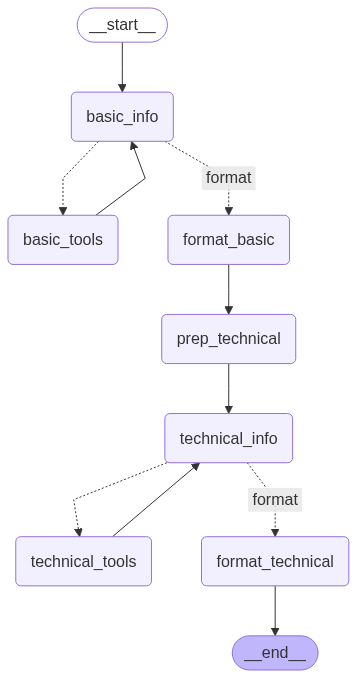

In [84]:
from IPython.display import display,Image

display(Image(graph_new.get_graph().draw_mermaid_png()))

In [85]:
sys_msg = SystemMessage(content=SYSTEM_PROMPT.format(tool_names=tool_names))
human_msg = HumanMessage(content=BASIC_MISSION_PROMPT.format(
    satellite_name=satellite_name,
    format_instructions=basic_data_format_instructions
))

input_state = {
    "satellite_name": satellite_name,
    "messages": [sys_msg, human_msg]
}

In [86]:
result = graph_new.invoke(input=input_state)

---Getting Basic Info---


AttributeError: 'HumanMessage' object has no attribute 'tool_calls'

In [141]:
result["technical_data"]

KeyError: 'technical_data'

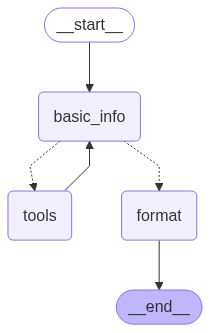

In [92]:
from IPython.display import display,Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [27]:
from langchain_core.messages import BaseMessage,SystemMessage,HumanMessage,AIMessage,ToolMessage

class AgentState(BaseModel):
    satellite_name: str
    error_message: Optional[str] = None
    messages: Annotated[list[BaseMessage], add_messages]

In [28]:

def initialize_state(satellite_name: str) -> AgentState:
    sys_msg = SystemMessage(content=SYSTEM_PROMPT.format(tool_names=tool_names))
    human_msg = HumanMessage(content=BASIC_MISSION_PROMPT.format(satellite_name=satellite_name, format_instructions=format_instructions))
    
    return AgentState(
        satellite_name=satellite_name,
        error_message=None,
        messages=[sys_msg, human_msg]
    )

In [29]:
initial_state = initialize_state("Aditya-L1") 

In [30]:
def chatbot(state: AgentState):
    try:
        response = llm_with_tools.invoke(state.messages)
        assert len(response.tool_calls) <= 1
        return state.model_copy(update={
            "messages": state.messages + [response],
        })
    except Exception as e:
        return state.model_copy(update={
            "error_message": str(e),
        })


In [31]:
graph_builder=StateGraph(AgentState)
graph_builder.add_node("chatbot",chatbot)
graph_builder.add_node("tools",tool_node)
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("tools","chatbot")
graph_builder.add_edge("chatbot",END)
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition
)

In [32]:
graph=graph_builder.compile()

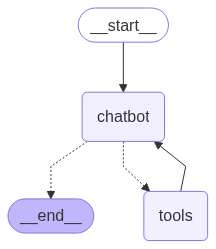

In [33]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [34]:
result = graph.invoke(initial_state)

In [35]:
print(result["messages"][-1].content)

```json
{
	"altitude": "1.5 million km",
	"altitude_source_reference": "https://www.issdc.gov.in/adityal1.html",
	"orbital_life_years": "null",
	"orbital_life_source_reference": "null",
	"launch_orbit_classification": "Halo orbit around the Lagrangian point 1 (L1) of the Sun-Earth system",
	"launch_orbit_source_reference": "https://www.isro.gov.in/Aditya_L1.html",
	"number_of_payloads": "7",
	"number_of_payloads_source_reference": "https://www.issdc.gov.in/adityal1.html"
}
```


In [89]:
class AgentState(BaseModel):
    satellite_name: str
    error_message: Optional[str] = None
    messages: Annotated[list[BaseMessage], add_messages]

In [90]:
from langgraph.prebuilt import create_react_agent

In [91]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm=ChatGoogleGenerativeAI(model="gemini-1.5-flash")

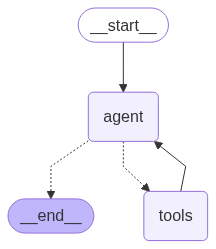

In [92]:
agent=create_react_agent(
    model=llm,
    tools=tools
)
display(Image(agent.get_graph().draw_mermaid_png()))

In [93]:
result=agent.invoke(input=input)

InvalidUpdateError: Expected dict, got <bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x7776d402a660>>
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_GRAPH_NODE_RETURN_VALUE

In [50]:
for m in result["messages"]:
    m.pretty_print()

================================ System Message ================================


You are a Satellite Data Extraction Agent that can use tools like web search to help you answer questions about satellite missions.

Your job is to:
1. Search for reliable information about a satellite mission using the available tools.
2. Extract specific structured information from those results.
3. Format your output strictly following the given schema.


Tool Names:
['google_serper_results_json', 'tavily_search_results_json']

ALWAYS use the tools to find facts instead of guessing or relying on your own knowledge.

Once you have all the information, respond in the exact structured JSON format.

Use "null" if any field is missing or not found. Do not make up values.

'VERY IMPORTANT TO REMEMBER:'
You may only call one tool at a time. Do not call multiple tools in a single response.
Always return valid JSON-formatted arguments for the tool input.
When you receive search results from a tool, carefully a

In [47]:
print(result["messages"][-1].content)

```json
{
  "altitude": "Lagrange point 1 (L1)",
  "altitude_source_reference": "https://www.isro.gov.in/aditya-l1-mission",
  "orbital_life_years": "5 years",
  "orbital_life_source_reference": "https://www.isro.gov.in/aditya-l1-mission",
  "launch_orbit_classification": "Halo orbit around L1",
  "launch_orbit_source_reference": "https://www.isro.gov.in/aditya-l1-mission",
  "number_of_payloads": "7",
  "number_of_payloads_source_reference": "https://www.isro.gov.in/aditya-l1-mission"
}
```


In [49]:
for chunk in agent.stream(
    {"messages": [{"role": "system", "content": SYSTEM_PROMPT.format(tool_names=tool_names)},
                  {"role":"user","content":BASIC_MISSION_PROMPT.format(satellite_name=satellite_name,format_instructions=format_instructions)}]},
    stream_mode="updates"
):
    print(chunk)
    print("\n")

{'agent': {'messages': [AIMessage(content='```json\n{\n  "altitude": "Lagrange point 1 (L1)",\n  "altitude_source_reference": "https://www.isro.gov.in/Aditya-L1-Mission",\n  "orbital_life_years": "5 years",\n  "orbital_life_source_reference": "https://www.isro.gov.in/Aditya-L1-Mission",\n  "launch_orbit_classification": "Halo orbit around L1",\n  "launch_orbit_source_reference": "https://www.isro.gov.in/Aditya-L1-Mission",\n  "number_of_payloads": "7",\n  "number_of_payloads_source_reference": "https://www.isro.gov.in/Aditya-L1-Mission"\n}\n```', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash', 'safety_ratings': []}, id='run--1340fac6-edf9-4c92-9eaf-3b193d1508b8-0', usage_metadata={'input_tokens': 1146, 'output_tokens': 191, 'total_tokens': 1337, 'input_token_details': {'cache_read': 0}})]}}




In [7]:
from langchain.output_parsers import StructuredOutputParser,ResponseSchema

In [12]:
output_parser = StructuredOutputParser.from_response_schemas(
    [
        ResponseSchema(
            name="basic_satellite_data", description="Extracts basic satellite data", schema=BasicSatelliteData
    )
    ]
)
format_instructions = output_parser.get_format_instructions()


In [13]:
format_instructions

'The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":\n\n```json\n{\n\t"basic_satellite_data": string  // Extracts basic satellite data\n}\n```'